In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix

import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, classification_report

In [7]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
df.shape

(14640, 15)

# ****Data Preprocessing****

In [9]:
#Check for NaN values in each column
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
#Percentage of NaN values
((len(df)-df.count())/len(df))*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [11]:
del df['airline_sentiment_gold']
del df['negativereason_gold']
del df['tweet_coord']

In [12]:
df.shape

(14640, 12)

In [13]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [36]:
#Sentiment Count 
sentiment_count = df.airline_sentiment.value_counts()
#Airline Review Count
airline_total = df['airline'].value_counts()

Text(0.5, 1.0, 'Airline Review Count')

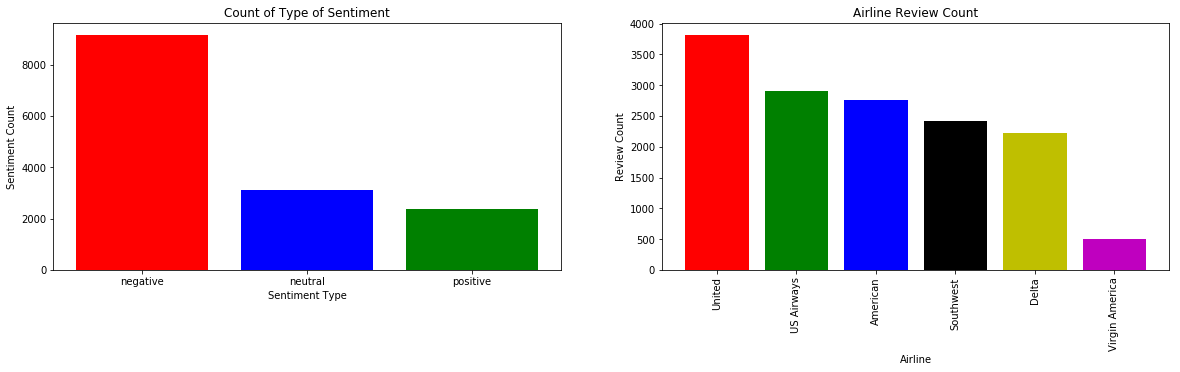

In [37]:
index = [1,2,3]
plt.figure(1,figsize=(20,10))
plt.subplot(221)
plt.bar(index,sentiment_count,color=['red','blue','green'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')
Index=[1,2,3,4,5,6]
my_colors = 'rgbkym'
plt.subplot(222)
plt.bar(Index,airline_total,color=my_colors)
plt.xticks(Index,['United','US Airways','American','Southwest','Delta','Virgin America'],rotation=90)
plt.xlabel('Airline')
plt.ylabel('Review Count')
plt.title('Airline Review Count')

From the plot it is observed that the majority of the sentiments are negative sentiments.  

In [16]:
airline_count = df.groupby('airline')['airline_sentiment'].value_counts()

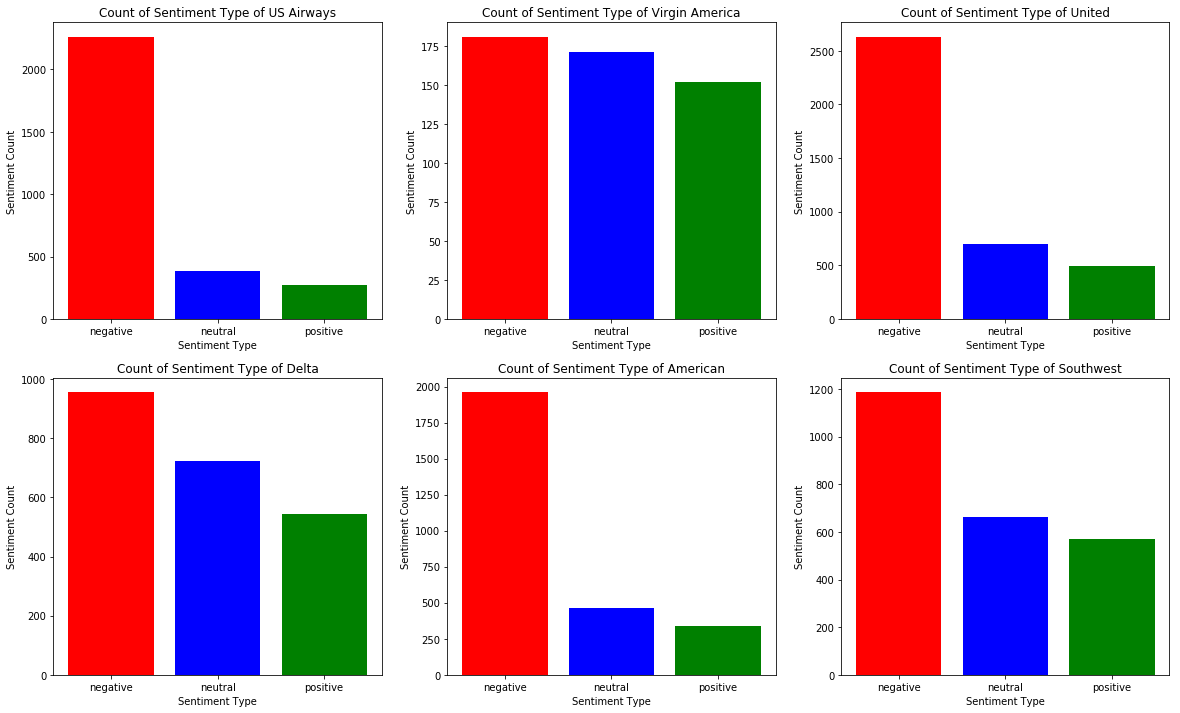

In [17]:
def plot_sentiment_airline(airline):
    df_airline = df[df['airline']==airline]
    count = df_airline['airline_sentiment'].value_counts()
    index = [1,2,3]
    plt.bar(index,count,color=['red','blue','green'])
    plt.xticks(index,['negative','neutral','positive'],rotation=0)
    plt.xlabel('Sentiment Type')
    plt.ylabel('Sentiment Count')
    plt.title('Count of Sentiment Type of '+airline)
airlines = ['US Airways','Virgin America','United','Delta','American','Southwest']
for i in range(len(airlines)):
    plt.figure(1,figsize=(20,12))
    temp = 231+i
    plt.subplot(temp)
    plot_sentiment_airline(airlines[i])

*  Negative sentiment of United is higher compared to negative sentiment of other airlines. 
* US Airways, American, Southwest have high number of negative sentiments. 
* Delta and Virgin America's reviews are evenly balanced. 

In [18]:
timezone_count = df['user_timezone'].value_counts()
tweet = df.groupby(['airline','airline_sentiment'])['user_timezone'].value_counts()

In [19]:
# Airlines' Negative Sentiment Count by Date
df['tweet_created']=pd.to_datetime(df['tweet_created'])
df['tweet_created'] = df['tweet_created'].dt.date
day = df.groupby(['tweet_created','airline'])['airline_sentiment'].value_counts(sort=True)

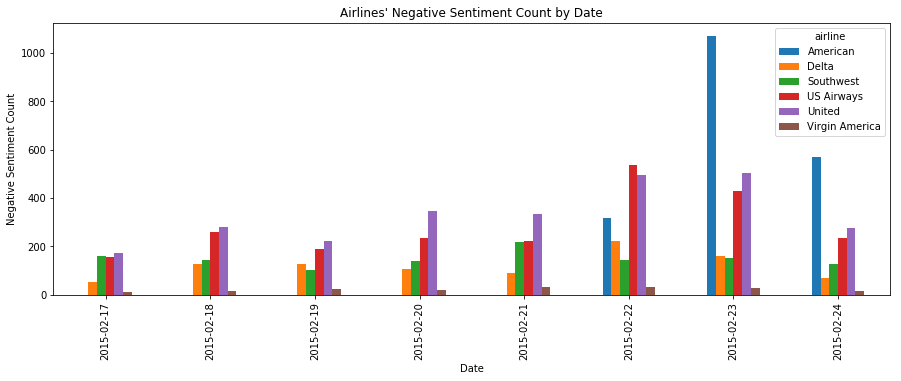

In [20]:
date = day.loc(axis=0)[:,:,'negative']
date.groupby(['tweet_created','airline']).sum().unstack().plot(kind='bar',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Negative Sentiment Count')
plt.title("Airlines' Negative Sentiment Count by Date")
plt.show()

*  It's observed that on 23 February 2015 and 24 February 2015, American Airlines had the highest number of negative reviews. A sudden surge in negative reviews was observed. 
* From 2015-02-23 to 2015-02-24, the negative reviews for American airlines reduced to almost half. 
* Delta and Southwest overall have a fairly low amount of negative reviews. 
* A surge in negative reviews for airlines is observed at the end of the week. 

In [21]:
#Number of Unique Negative Reasons 
df['negativereason'].nunique()

10

In [22]:
#Negative Reason Count
nr_count = df['negativereason'].value_counts()
nr_dict = dict(df['negativereason'].value_counts())

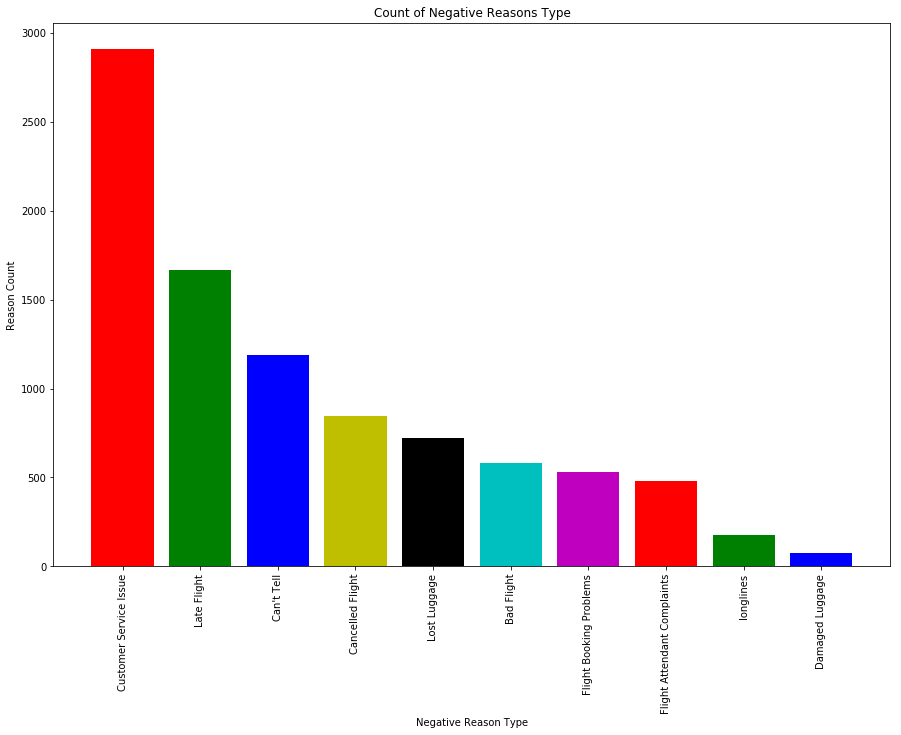

In [23]:
nr = ["Customer Service Issue","Late Flight","Can't Tell", "Cancelled Flight", "Lost Luggage", "Bad Flight","Flight Booking Problems",         
"Flight Attendant Complaints","longlines","Damaged Luggage"]

def plot_negativereason_count(reason,reason_count):
    index=list(range(10))
    plt.figure(figsize=(15,10))
    plot_colors = 'rgbykcm'
    plt.bar(index,reason_count,color=plot_colors)
    plt.xticks(index,reason,rotation=90)
    plt.xlabel('Negative Reason Type')
    plt.ylabel('Reason Count')
    plt.title('Count of Negative Reasons Type')
plot_negativereason_count(nr,nr_count)

* Customer Service Issue is the main reason[](http://) for a negative sentiment followed by Late Flight.
* Damaged Luggage is observed to be the least probable reason for which a negative sentiment is observed. 

In [24]:
negative_df = df.groupby('airline')['negativereason'].value_counts(ascending=False)

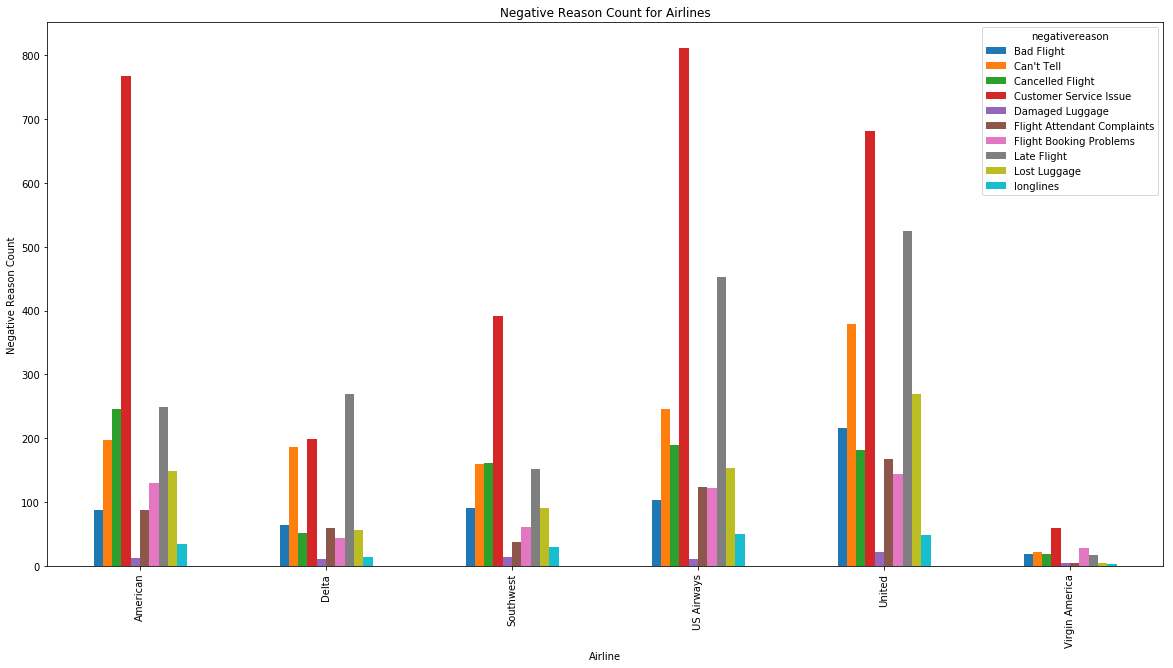

In [25]:
#Negative Reason Count for Airlines
negative_df.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(20,10))
plt.xlabel('Airline')
plt.ylabel('Negative Reason Count')
plt.title("Negative Reason Count for Airlines")
plt.show()

* It is observed that American, US Airways, and, United have the highest negative reviews for **Customer Service Issue** making this reason the main concern for airlines. 
* The top negative reason for all airlines except Delta is Customer Service Issue. 
* The least popular reason for negative reviews for all airlines except Virgin America is Damaged Luggage. 

## Preprocessing text of the tweets

In [28]:
def text_to_words(tweet):
    letters = re.sub("^a-zA-Z"," ",tweet)
    words = letters.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join(meaningful_words))

In [29]:
df['sentiment'] = df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
df['text_clean'] = df['text'].apply(lambda x:text_to_words(x))

In [30]:
#Train-test split
train,test=train_test_split(df,test_size=0.2,random_state=42)

The dataset is split into training and testing dataset in the 80:20 ratio.

In [31]:
def clean_tweet(tweet_text):
    res = []
    for tweet in tweet_text:
        res.append(tweet)
    return res
train_clean_text = clean_tweet(train['text_clean'])
test_clean_text = clean_tweet(test['text_clean'])

In [32]:
counter_vectorizer = CountVectorizer(analyzer = "word")
train_features= counter_vectorizer.fit_transform(train_clean_text)
test_features=counter_vectorizer.transform(test_clean_text)

In [33]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.025, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.6451502732240437
              precision    recall  f1-score   support

           0       1.00      0.65      0.78      2928
           1       0.00      0.00      0.00         0

   micro avg       0.65      0.65      0.65      2928
   macro avg       0.50      0.32      0.39      2928
weighted avg       1.00      0.65      0.78      2928

[[1889 1039]
 [   0    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


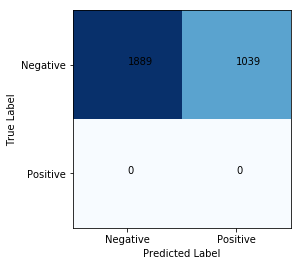

Accuracy of DecisionTreeClassifier is 0.7609289617486339
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1887
           1       0.66      0.66      0.66      1041

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.74      0.74      0.74      2928
weighted avg       0.76      0.76      0.76      2928

[[1538  349]
 [ 351  690]]


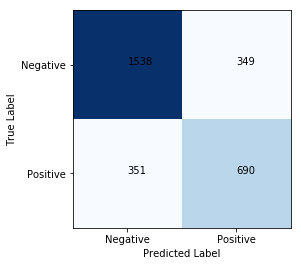

Accuracy of RandomForestClassifier is 0.8176229508196722
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1981
           1       0.70      0.77      0.73       947

   micro avg       0.82      0.82      0.82      2928
   macro avg       0.79      0.80      0.80      2928
weighted avg       0.82      0.82      0.82      2928

[[1668  313]
 [ 221  726]]


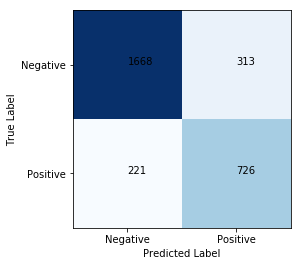

Accuracy of GradientBoostingClassifier is 0.7756147540983607
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2190
           1       0.54      0.76      0.63       738

   micro avg       0.78      0.78      0.78      2928
   macro avg       0.72      0.77      0.73      2928
weighted avg       0.81      0.78      0.79      2928

[[1711  479]
 [ 178  560]]


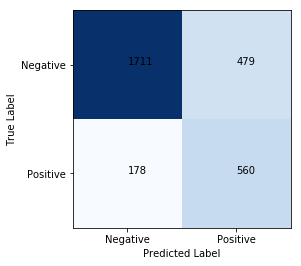

Accuracy of GaussianNB is 0.5850409836065574
              precision    recall  f1-score   support

           0       0.46      0.82      0.59      1062
           1       0.81      0.45      0.58      1866

   micro avg       0.59      0.59      0.59      2928
   macro avg       0.64      0.64      0.59      2928
weighted avg       0.68      0.59      0.58      2928

[[ 868  194]
 [1021  845]]


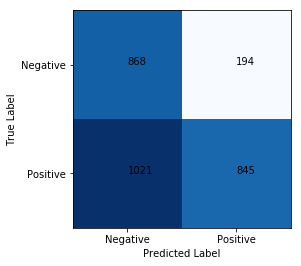

In [41]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['sentiment']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative', 'Positive'],color='black')
    plt.yticks(range(2), ['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

**Random Forest Classifier** has the highest accuracy as well as the f-1 score. 

Text(0.5, 1.0, 'Classifier Accuracies')

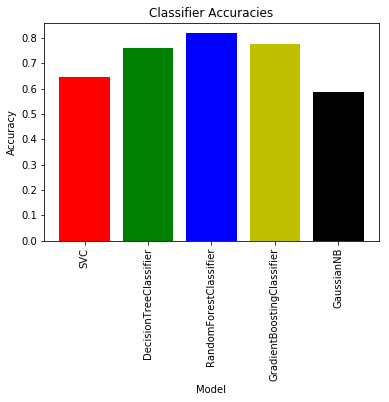

In [42]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

It is observed that **Random Forest Classifier** performs better than the other classifiers for the given dataset. 
**Random Forest Classifier** has the highest accuracy among all the algorithms. 